## Packages imports and uploading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pointbiserialr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score


# Loading train and test datasets
train = pd.read_csv('insurance_train.csv')  # contains claim_status
test  = pd.read_csv('insurance_test.csv')

train['support_interactions'] = train['support_interactions'].astype("category")
test['support_interactions'] = test['support_interactions'].astype("category")
train['claim_status'] = train['claim_status'].astype("category")

# Preparing X and y
X_train = train.drop(columns=['claim_status'])
y_train = train['claim_status'].astype('category')

## Exploratory Data Analysis

In [2]:
print("=== TRAIN: Head ===")
display(train.head())

print("\n=== TRAIN: Info ===")
train.info()

print("\n=== TRAIN: Describe ===")
display(train.describe())
display(train.describe(include=['O']))

=== TRAIN: Head ===


,reward,claim_status,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21
1,18.428627,0,9b2d5b46,type_a,web,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6
2,0.000000,0,9b2d5b46,type_a,web,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84
3,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39
4,0.000000,0,9b2d5b46,type_a,web,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48



=== TRAIN: Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56993 entries, 0 to 56992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   reward                56993 non-null  float64 
 1   claim_status          56993 non-null  category
 2   person_gender         56993 non-null  object  
 3   entity_type           56993 non-null  object  
 4   channel               56993 non-null  object  
 5   support_interactions  56993 non-null  category
 6   agent_id              56993 non-null  object  
 7   customer_score        56993 non-null  float64 
 8   entity_a              56993 non-null  object  
 9   person_age            56993 non-null  int64   
 10  location              56993 non-null  object  
 11  revenue               56993 non-null  float64 
 12  product_id            56993 non-null  object  
 13  trip_length           56993 non-null  int64   
dtypes: category(2), float64(3), int64

,reward,customer_score,person_age,revenue,trip_length
count,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000
mean,9.794976,0.189540,39.697261,40.750070,49.234888
std,19.791119,0.080641,12.603433,48.749221,98.659469
min,0.000000,0.000000,18.000000,-406.642669,1.000000
25%,0.000000,0.136389,34.000000,18.246389,9.000000
50%,0.000000,0.181041,36.000000,26.785242,22.000000
75%,11.336612,0.230836,44.000000,47.809948,53.000000
max,282.073580,1.000000,100.000000,801.049866,4856.000000


,person_gender,entity_type,channel,agent_id,entity_a,location,product_id
count,56993,56993,56993,56993,56993,56993,56993
unique,3,2,2,16,16,146,26
top,9b2d5b46,type_a,web,agt_0004,50b3e71e,singapore,TripGuard Cancel
freq,40643,41297,56019,31663,31663,11942,16795


In [3]:
# Missing Values
print("=== TRAIN: Missing Values ===")
print(train.isnull().sum())

=== TRAIN: Missing Values ===
reward                  0
claim_status            0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64


/var/folders/0q/5b_w9lks03q5rmn_h9_p9fmw0000gn/T/ipykernel_80402/2129748422.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/0q/5b_w9lks03q5rmn_h9_p9fmw0000gn/T/ipykernel_80402/2129748422.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/0q/5b_w9lks03q5rmn_h9_p9fmw0000gn/T/ipykernel_80402/2129748422.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/0q/5b_w9lks03q5rmn_h9_p9fmw0000gn/T/ipykernel_80402/2129748422.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

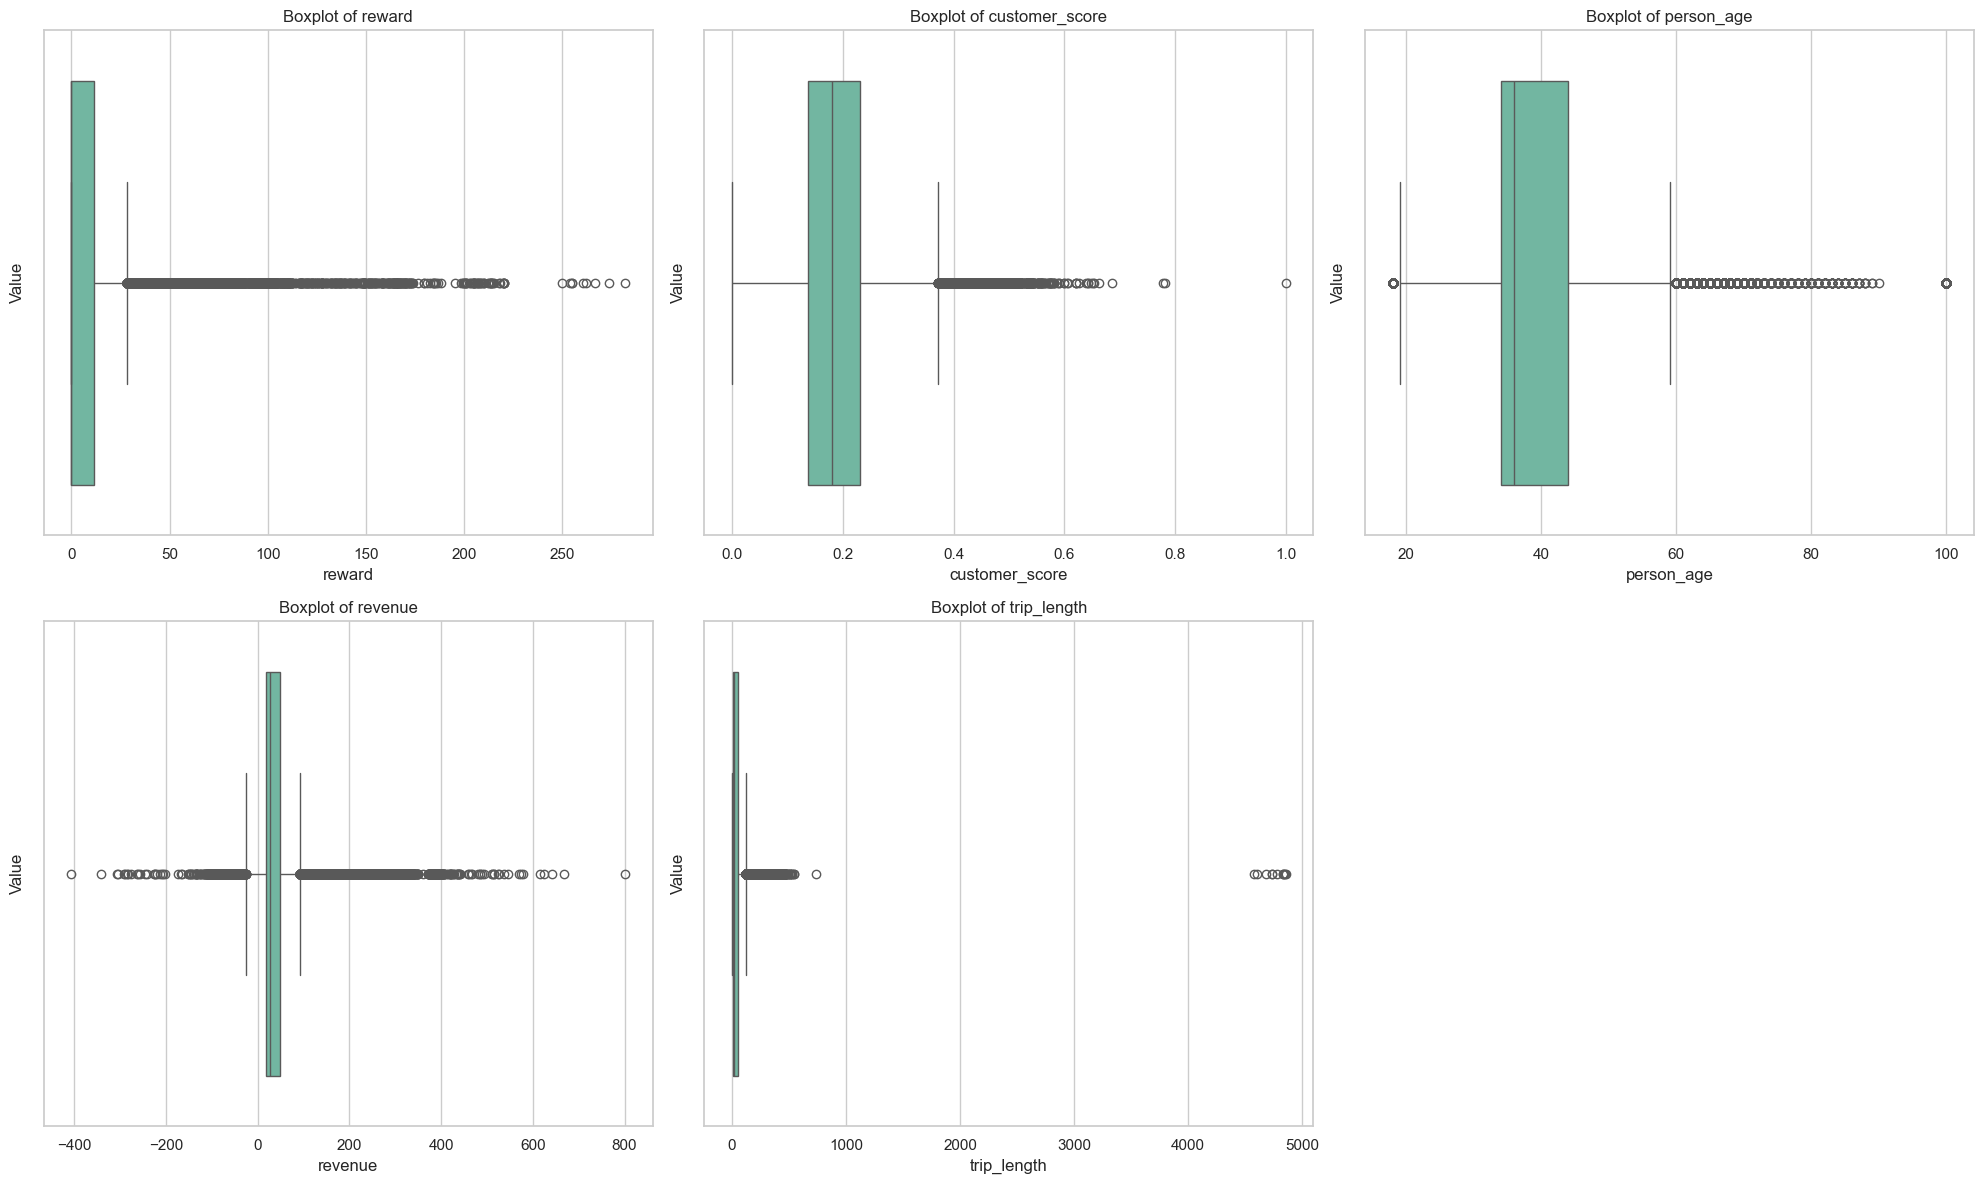

In [4]:
# Numeric Boxplots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_cols = ['reward', 'customer_score', 'person_age', 'revenue', 'trip_length']

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))

for i, col in enumerate(numeric_cols):
    ax = axes.flatten()[i]
    sns.boxplot(
        x=X_train[col],
        palette='Set2',
        ax=ax
    )
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Value")

for j in range(len(numeric_cols), n_rows * n_cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()


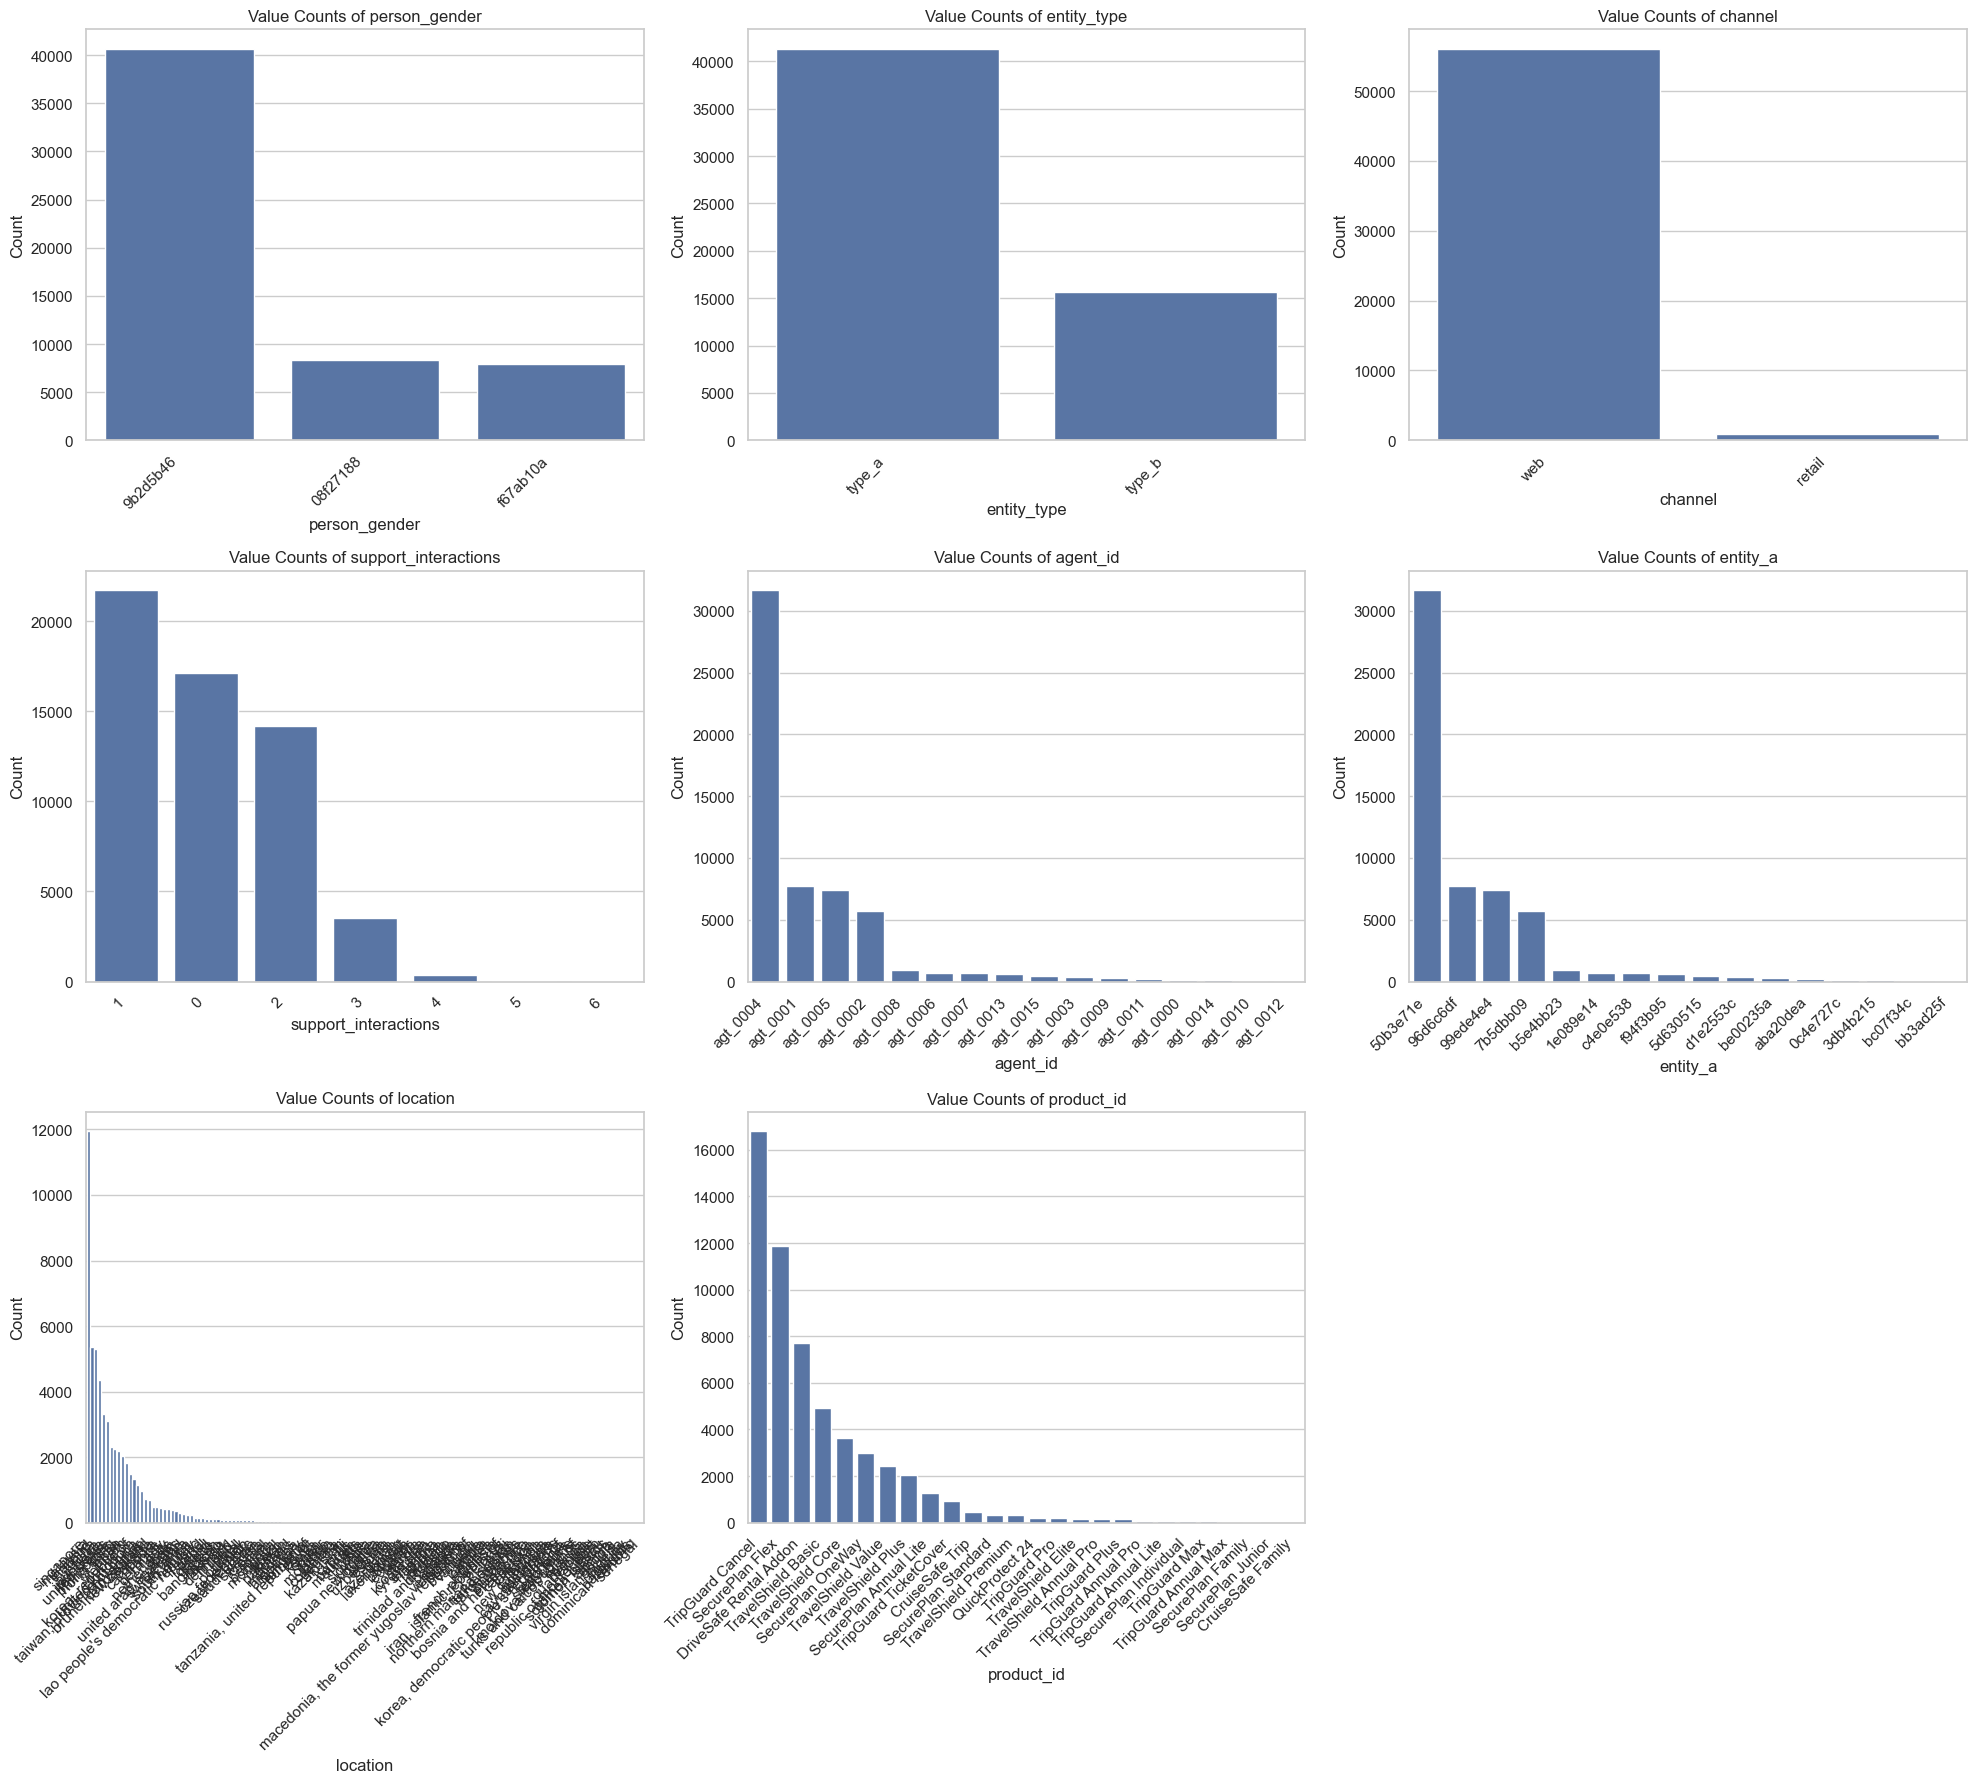

In [5]:
# Categorical Counts
import seaborn as sns

sns.set(style="whitegrid")

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))

for i, col in enumerate(categorical_cols):
    ax = axes.flatten()[i]
    sns.countplot(
        x=col,
        data=X_train,
        order=X_train[col].value_counts().index,
        ax=ax
    )
    ax.set_title(f"Value Counts of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

for j in range(len(categorical_cols), n_rows * n_cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()


/var/folders/0q/5b_w9lks03q5rmn_h9_p9fmw0000gn/T/ipykernel_80402/1126296583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=y_train_df, palette='pastel')


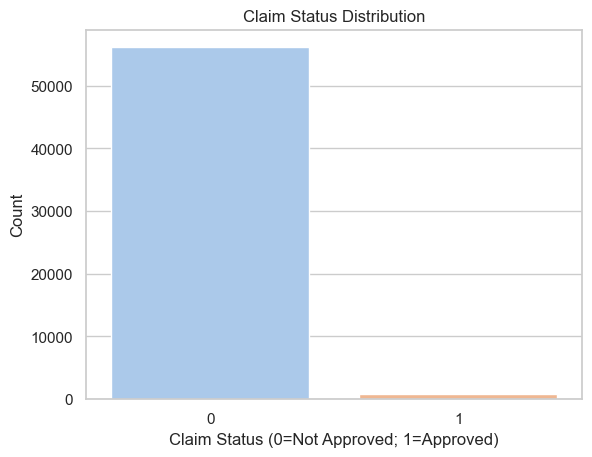

In [6]:
y_train_df = y_train.to_frame(name='claim_status')

# Plot
sns.countplot(x='claim_status', data=y_train_df, palette='pastel')
plt.title('Claim Status Distribution')
plt.xlabel('Claim Status (0=Not Approved; 1=Approved)')
plt.ylabel('Count')
plt.show()


## Feature Engineering

This step applies outlier clipping to numeric columns, creates a binary refund flag, and buckets age into three groups. We collapse rare levels in high-cardinality categorical fields into “other” and then reassemble numeric and categorical feature lists. After measuring baseline performance with logistic regression, we add log transforms and interaction terms as new numeric features. Finally, we rerun cross-validation to quantify how much these engineered features improve balanced accuracy.


In [7]:
X_orig = X_train.copy()
y = y_train.copy()

# Clipping numeric outliers

for col, q in [
    ('reward',        0.99),
    ('customer_score',0.99),
    ('person_age',    0.95),
    ('revenue',       0.99),
    ('trip_length',   0.99)
]:
    cap_val = X_orig[col].quantile(q)
    X_orig[col] = X_orig[col].clip(upper=cap_val)

X_orig['refund_flag'] = (X_orig['revenue'] < 0).astype(int)
X_orig['revenue'] = X_orig['revenue'].clip(lower=0)

X_orig['age_bucket'] = pd.cut(
    X_orig['person_age'],
    bins=[17, 30, 60, X_orig['person_age'].max()],
    labels=['young', 'mid', 'senior']
)

# Collapsing rare categories for high-cardinality fields

categorical_cols = [
    c for c in X_orig.select_dtypes(include=['object']).columns
    if c != 'channel'
]

for col in categorical_cols:
    freqs = X_orig[col].value_counts(normalize=True)
    cumfreq = freqs.cumsum()
    major_cats = freqs[cumfreq <= 0.90].index.tolist()
    if len(major_cats) == 0:
        major_cats = [freqs.index[0]]
    X_orig[col] = X_orig[col].where(X_orig[col].isin(major_cats), other='other')

# Defining final feature lists

num_orig_intended = ['reward', 'customer_score', 'person_age', 'revenue', 'trip_length']
num_orig = [c for c in num_orig_intended if c in X_orig.columns]


cat_orig_intended = [
    'person_gender', 'entity_type', 'channel',
    'agent_id', 'entity_a', 'location', 'product_id',
    'age_bucket','support_interactions'
]
cat_orig = [c for c in cat_orig_intended if c in X_orig.columns]

# Setting up preprocessing pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preproc_orig = ColumnTransformer([
    ('num', num_pipe, num_orig),
    ('cat', cat_pipe, cat_orig)
])

# Baseline CV
pipe_baseline = Pipeline([
    ('preproc', preproc_orig),
    ('clf',     LogisticRegression(max_iter=1000, class_weight='balanced'))
])

scores_baseline = cross_val_score(
    pipe_baseline, X_orig, y,
    cv=5, scoring='balanced_accuracy', n_jobs=-1
)
print(f"BASELINE (after collapsing rare cats) → BalAcc: "
      f"{scores_baseline.mean():.4f} ± {scores_baseline.std():.4f}")

# Building engineered features

X_eng = X_orig.copy()

# Numeric transformations
X_eng['log_reward']      = np.log1p(X_eng['reward'])
X_eng['log_revenue']     = np.log1p(X_eng['revenue'])
X_eng['age_sq']          = X_eng['person_age'] ** 2
X_eng['reward_x_score']  = X_eng['reward'] * X_eng['customer_score']
X_eng['log_trip_length'] = np.log1p(X_eng['trip_length'])
X_eng['trip_length_x_score'] = X_eng['trip_length'] * X_eng['customer_score']


# Numeric and categorical list for engineered data
num_eng_intended = num_orig + [
    'log_reward', 'log_revenue', 'age_sq',
    'reward_x_score', 'log_trip_length', 'trip_length_x_score'
]
num_eng = [c for c in num_eng_intended if c in X_eng.columns]

# The categorical list remains exactly as cat_orig above
cat_eng = list(cat_orig)

preproc_eng = ColumnTransformer([
    ('num', num_pipe, num_eng),
    ('cat', cat_pipe, cat_eng)
])

# Running cross-validation on the engineered pipeline
pipe_eng = Pipeline([
    ('preproc', preproc_eng),
    ('clf',     LogisticRegression(max_iter=1000, class_weight='balanced'))
])

scores_eng = cross_val_score(
    pipe_eng, X_eng, y,
    cv=5, scoring='balanced_accuracy', n_jobs=-1
)
print(f"WITH ENGINEERED FEATURES → BalAcc: {scores_eng.mean():.4f} ± {scores_eng.std():.4f}")

delta = scores_eng.mean() - scores_baseline.mean()
print(f"Impact of engineered features: ΔBalAcc = {delta:+.4f}")


BASELINE (after collapsing rare cats) → BalAcc: 0.7490 ± 0.0096
WITH ENGINEERED FEATURES → BalAcc: 0.7536 ± 0.0109
Impact of engineered features: ΔBalAcc = +0.0046


## Splitting train data into train, validation and test sets

In [8]:
# trainval / test_holdout
X_trainval, X_test_holdout, y_trainval, y_test_holdout = train_test_split(
    X_eng, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# trainval -> train / validation
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,
    stratify=y_trainval,
    random_state=42
)

print(X_train.shape, X_val.shape, X_test_holdout.shape)
print(y_train.value_counts(normalize=True),
      y_val.value_counts(normalize=True),
      y_test_holdout.value_counts(normalize=True))

(34195, 21) (11399, 21) (11399, 21)
claim_status
0    0.985378
1    0.014622
Name: proportion, dtype: float64 claim_status
0    0.98535
1    0.01465
Name: proportion, dtype: float64 claim_status
0    0.98535
1    0.01465
Name: proportion, dtype: float64


## Modeling

In this cell, we define preprocessing (imputation, scaling, one‐hot encoding) for our engineered numeric and categorical features, then set up three pipelines: Logistic Regression, KNN, and RBF‐kernel SVM each wrapped in a GridSearchCV to tune their key hyperparameters. We use 3‐fold cross‐validation and balanced accuracy as the scoring metric to choose the best model.


In [9]:
num_eng = [
    'reward','customer_score','person_age','revenue','trip_length',
    'log_reward','log_revenue','age_sq','reward_x_score','log_trip_length'
]
cat_eng = [
    'person_gender','entity_type','channel',
    'agent_id','entity_a','location','product_id','support_interactions'
]

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_eng),
    ('cat', cat_pipe, cat_eng)
])

models = {
    'logistic': {
        'pipeline': Pipeline([
            ('preproc', preprocessor),
            ('clf',     LogisticRegression(max_iter=1000, class_weight='balanced'))
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100]
        }
    },
    'knn': {
        'pipeline': Pipeline([
            ('preproc', preprocessor),
            ('clf',     KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights':     ['uniform', 'distance']
        }
    },
    'svc': {
        'pipeline': Pipeline([
            ('preproc', preprocessor),
            ('clf',     SVC(class_weight='balanced'))
        ]),
        'params': {
            'clf__kernel': ['rbf'],  
            'clf__C':      [0.1, 1,],
            'clf__gamma':  ['scale'] 
        }
    }
}

results = {}
for name, md in models.items():
    grid = GridSearchCV(
        md['pipeline'], 
        md['params'], 
        cv=3,                 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    print(f"Starting grid‐search for {name.upper()} …")
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    preds = best_model.predict(X_val)
    bal_acc = balanced_accuracy_score(y_val, preds)
    results[name] = {
        'best_params':        grid.best_params_,
        'validation_bal_acc': bal_acc
    }
    print(f"{name.upper():10} | Best Params: {grid.best_params_} | Val BalAcc: {bal_acc:.4f}\n")

print("Summary of results:\n", pd.DataFrame(results).T)


Starting grid‐search for LOGISTIC …
LOGISTIC   | Best Params: {'clf__C': 10} | Val BalAcc: 0.7226

Starting grid‐search for KNN …
KNN        | Best Params: {'clf__n_neighbors': 3, 'clf__weights': 'uniform'} | Val BalAcc: 0.5017

Starting grid‐search for SVC …
SVC        | Best Params: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'} | Val BalAcc: 0.7129

Summary of results:
                                                 best_params validation_bal_acc
logistic                                     {'clf__C': 10}           0.722637
knn       {'clf__n_neighbors': 3, 'clf__weights': 'unifo...           0.501703
svc       {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__k...           0.712863


## Final Model Training and Evaluation

Here, we lock in the best logistic‐regression hyperparameter (C=10) and retrain on the combined trainval set to maximize data usage. After concatenating X_train and X_val and resetting their indices, we fit the final pipeline on X_trainval and y_trainval. Finally, we predict on the  test_hold_out set and report the balanced accuracy.


In [10]:
best_logistic_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf',     LogisticRegression(C=10, max_iter=1000, class_weight='balanced'))
])

X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

X_trainval = X_trainval.reset_index(drop=True)
y_trainval = y_trainval.reset_index(drop=True)

best_logistic_pipeline.fit(X_trainval, y_trainval)

y_pred_holdout = best_logistic_pipeline.predict(X_test_holdout)
holdout_bal_acc = balanced_accuracy_score(y_test_holdout, y_pred_holdout)

print(f"Final hold‐out Balanced Accuracy (logistic, C=10): {holdout_bal_acc:.4f}")


Final hold‐out Balanced Accuracy (logistic, C=10): 0.7595


## Predictions

We apply the same features adjustments to the insurance_test.csv data that were used on the training set. Finally we use the best_logistic_pipeline (with C=10) to predict claim_status for each row. The resulting predictions are stored in a new claim_status_pred column and then exported to CSV.

In [11]:
for col, q in [
     ("reward",         0.99),
     ("customer_score", 0.99),
     ("person_age",     0.95),
     ("revenue",        0.99),
     ("trip_length",    0.99)
 ]:
     cap_value = test[col].quantile(q)
     test[col] = test[col].clip(upper=cap_value)

test["refund_flag"] = (test["revenue"] < 0).astype(int)
test["revenue"] = test["revenue"].clip(lower=0)
#
test["age_bucket"] = pd.cut(
     test["person_age"],
     bins=[18, 30, 60, test["person_age"].max()],
     labels=["young", "mid", "senior"]
)

test["log_reward"]      = np.log1p(test["reward"])
test["log_revenue"]     = np.log1p(test["revenue"])
test["age_sq"]          = test["person_age"] ** 2
test["reward_x_score"]  = test["reward"] * test["customer_score"]
test["log_trip_length"] = np.log1p(test["trip_length"])

test_preds = best_logistic_pipeline.predict(test)

test["claim_status_pred"] = test_preds

print(test.head())
test.to_csv("insurance_predictions.csv", index=False)


      reward person_gender entity_type channel support_interactions  agent_id  \
0  84.316320      9b2d5b46      type_a     web                    2  agt_0001   
1  45.884363      9b2d5b46      type_a     web                    0  agt_0001   
2   0.000000      9b2d5b46      type_a     web                    2  agt_0004   
3  29.363482      f67ab10a      type_b     web                    1  agt_0002   
4  12.440951      08f27188      type_b     web                    0  agt_0005   

   customer_score  entity_a  person_age   location  ...  \
0        0.009257  96d6c6df        31.0    ireland  ...   
1        0.108049  96d6c6df        29.0  australia  ...   
2        0.108814  50b3e71e        26.0  indonesia  ...   
3        0.215505  7b5dbb09        32.0     france  ...   
4        0.194798  99ede4e4        26.0  singapore  ...   

               product_id trip_length  refund_flag  age_bucket log_reward  \
0  DriveSafe Rental Addon        73.0            1         mid   4.446366   
1  D